<a href="https://www.kaggle.com/code/sameerprogrammer/ml-eda-practice?scriptVersionId=156859042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### 1. Getting Basic information about dataset 

### 2. EDA :- 
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

1. CountPlot
2. PieChart
3. Histogram
4. DisPlot
5. BoxPlot
6. Violin Plots
7. Scatter Plot
8. HeatMap
9. Cluster Map


### 3. Pandas Profilling :- 
Pandas profiling is a powerful Python library for data analysis and exploration. It provides a comprehensive report of a dataset, allowing you to quickly understand the structure and properties of your data. The report includes a summary of the data, missing values, and a distribution of variables.

* **Advantages**
 * **Ease of use:** Pandas profiling is very easy to use. ...
 * **Time-saving:** Pandas profiling can create a comprehensive report with a wide range of information about a dataset with minimal effort.
 * **Interactive HTML reports:** Pandas profiling generates interactive HTML reports that are easy to analyze and understand.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# from seaborn import load_dataset


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv', index_col=False)

### 1. Getting Basic information about dataset 


In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# fill NAN cell with mean of Age

# df["Age"].fillna(df["Age"].mean(), inplace=True)

# OR

# remove NAN rows of age in data
df= df.dropna(subset=['Age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [7]:
# change the dtype of columns to reduce size of dataset

df = df.astype({
    "Age": 'int32',          # Convert 'Age' column to int32
    "PassengerId": "int32",  # Convert 'PassengerId' column to int32
    "Pclass": "int32",       # Convert 'Pclass' column to int32
    "Survived": "int32",     # Convert 'Survived' column to int32
    "SibSp": "int32",        # Convert 'SibSp' column to int32
    "Parch": "int32",        # Convert 'Parch' column to int32
    "Fare": "float32"        # Convert 'Fare' column to float32
})


In [8]:
# checking size and nan cells of data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int32  
 1   Survived     714 non-null    int32  
 2   Pclass       714 non-null    int32  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    int32  
 6   SibSp        714 non-null    int32  
 7   Parch        714 non-null    int32  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float32
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float32(1), int32(6), object(5)
memory usage: 53.0+ KB


In [9]:
#  This function is used to get some basic mathematical information about data

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.679272,0.512605,0.431373,34.694515
std,259.119524,0.491460,0.838250,14.536483,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329224


# EDA :- 
 **Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.**

### 1. CountPlot

Survived
0    424
1    290
Name: count, dtype: int64

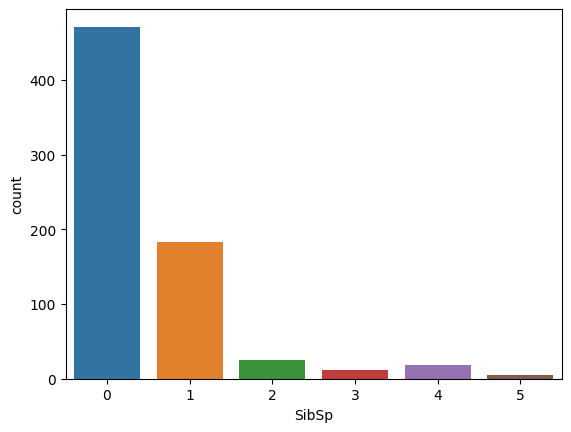

In [10]:
# sns.countplot(df["Survived"]) # not works
sns.countplot(data = df, x="SibSp")
# df['Survived'].value_counts().plot(kind ="bar")
df['Survived'].value_counts()

### 2. PieChart

<Axes: ylabel='count'>

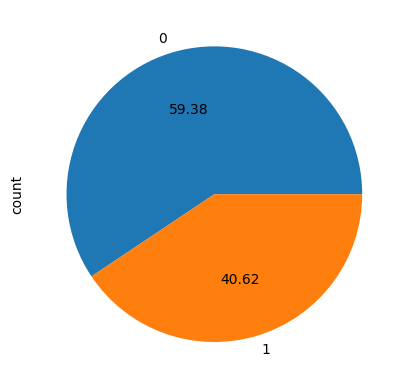

In [11]:
df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')

### 3. Histogram

(array([14., 16., 10.,  7.,  3., 12.,  6.,  1.,  9.,  5., 30., 51., 16.,
        51., 16., 54., 36., 27., 47., 17., 35., 34., 23., 17., 14., 21.,
        18.,  9., 17.,  9., 15., 17.,  6.,  9.,  3.,  6.,  7.,  4.,  7.,
         2.,  5.,  1.,  0.,  3.,  2.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ,
        17.6, 19.2, 20.8, 22.4, 24. , 25.6, 27.2, 28.8, 30.4, 32. , 33.6,
        35.2, 36.8, 38.4, 40. , 41.6, 43.2, 44.8, 46.4, 48. , 49.6, 51.2,
        52.8, 54.4, 56. , 57.6, 59.2, 60.8, 62.4, 64. , 65.6, 67.2, 68.8,
        70.4, 72. , 73.6, 75.2, 76.8, 78.4, 80. ]),
 <BarContainer object of 50 artists>)

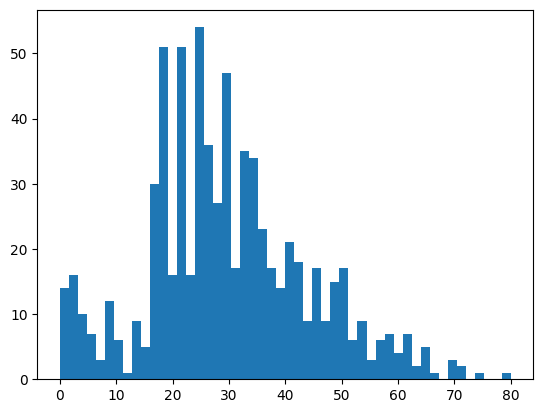

In [12]:
plt.hist(df['Age'], bins = 50)

### 4. Displot

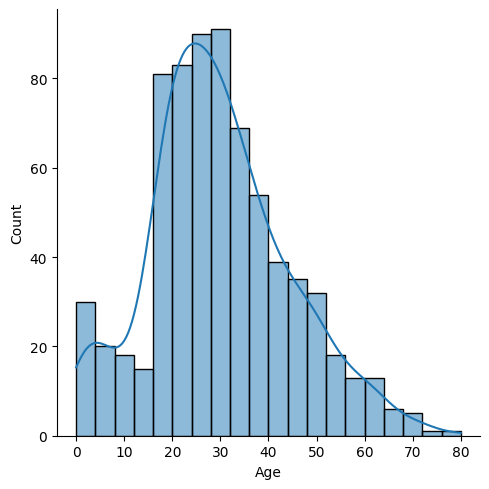

In [13]:
sns.displot(data=df, x='Age',kde=True)

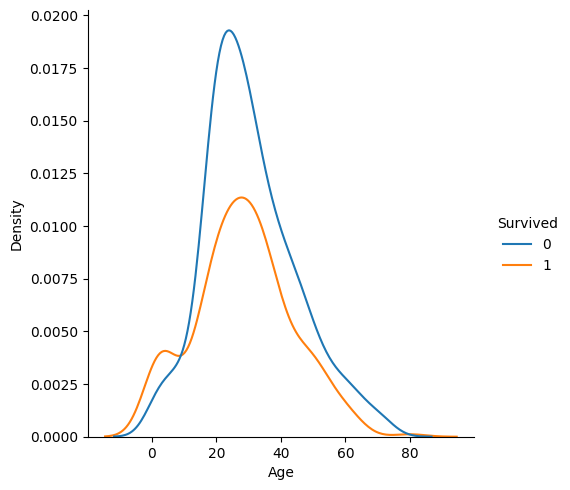

In [14]:
sns.displot(data=df, x='Age',kind="kde",hue="Survived")

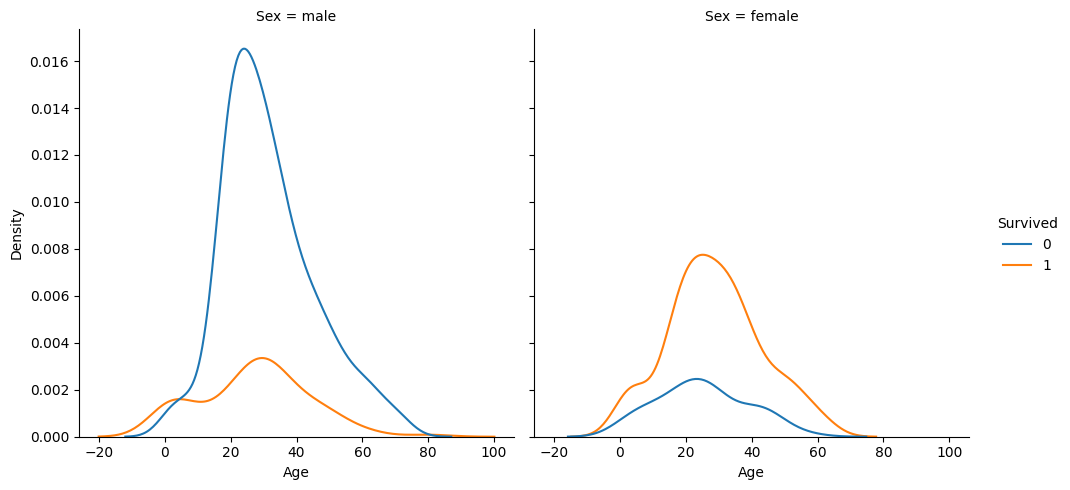

In [15]:
sns.displot(data=df, x='Age',kind="kde",hue="Survived",col="Sex")

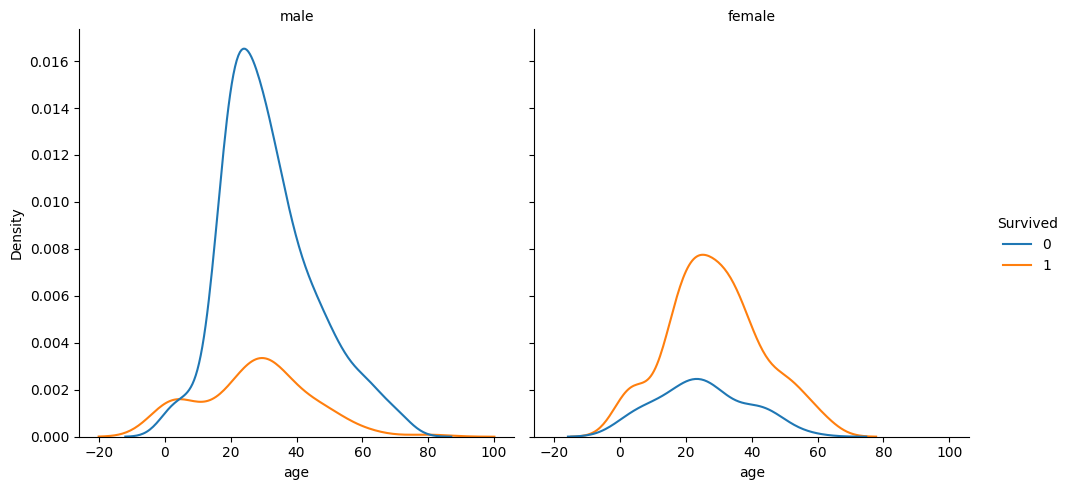

In [16]:
dis = sns.displot(data=df, x='Age',kind="kde",hue="Survived",col="Sex")
dis.set_axis_labels("age" , "Density")
dis.set_titles('{col_name}')

### 5. Boxplot

<Axes: xlabel='Sex', ylabel='Age'>

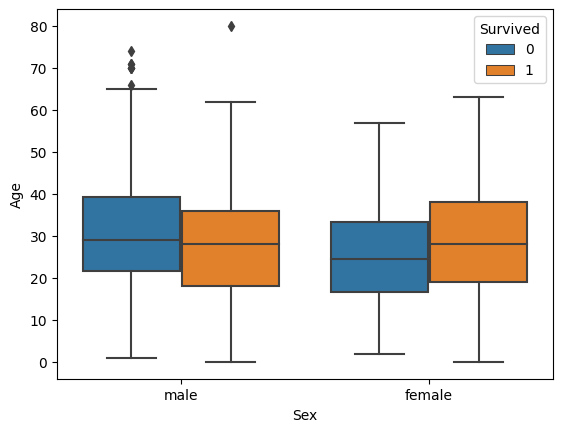

In [17]:
sns.boxplot(data = df, x = "Sex", y ="Age", hue="Survived")

### 6. Violin Plots

<Axes: xlabel='Age', ylabel='Sex'>

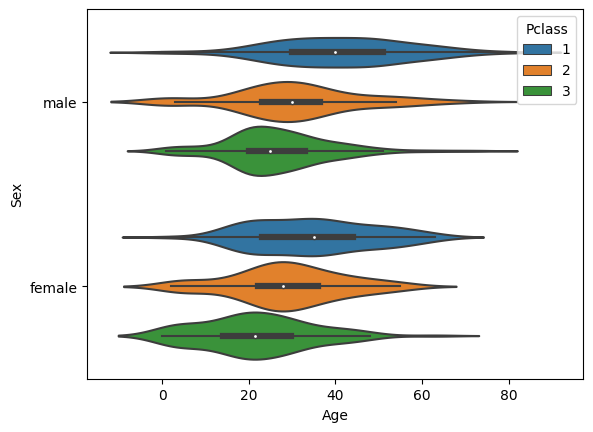

In [18]:
sns.violinplot(data=df, x="Age", y="Sex", hue="Pclass")

### 7. Scatter Plot

In [19]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
67,68,0,3,"Crease, Mr. Ernest James",male,19,0,0,S.P. 3464,8.158300,NaN,S
471,472,0,3,"Cacic, Mr. Luka",male,38,0,0,315089,8.662500,NaN,S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23,0,0,CA. 2314,7.550000,NaN,S
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22,1,2,SC/Paris 2123,41.579201,NaN,C
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21,0,0,STON/O 2. 3101294,7.925000,NaN,S
640,641,0,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.854200,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30,1,0,A/5. 3336,16.100000,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.500000,A6,S
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25,0,0,244361,13.000000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.158302,C50,C


<Axes: xlabel='Age', ylabel='Fare'>

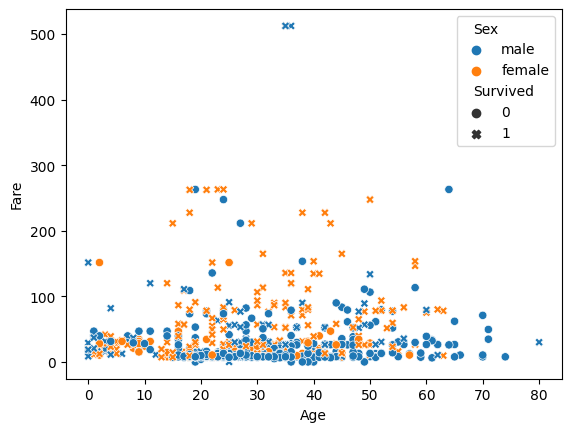

In [20]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex", style="Survived")

### 8. HeatMap

<Axes: xlabel='Survived', ylabel='Pclass'>

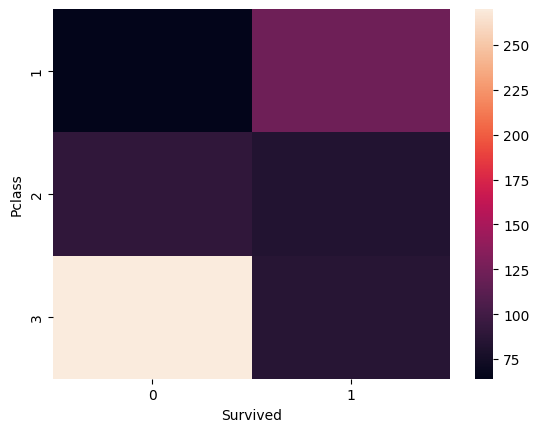

In [21]:
sns.heatmap(pd.crosstab(df['Pclass'], df['Survived']))

### 9. Cluster Map

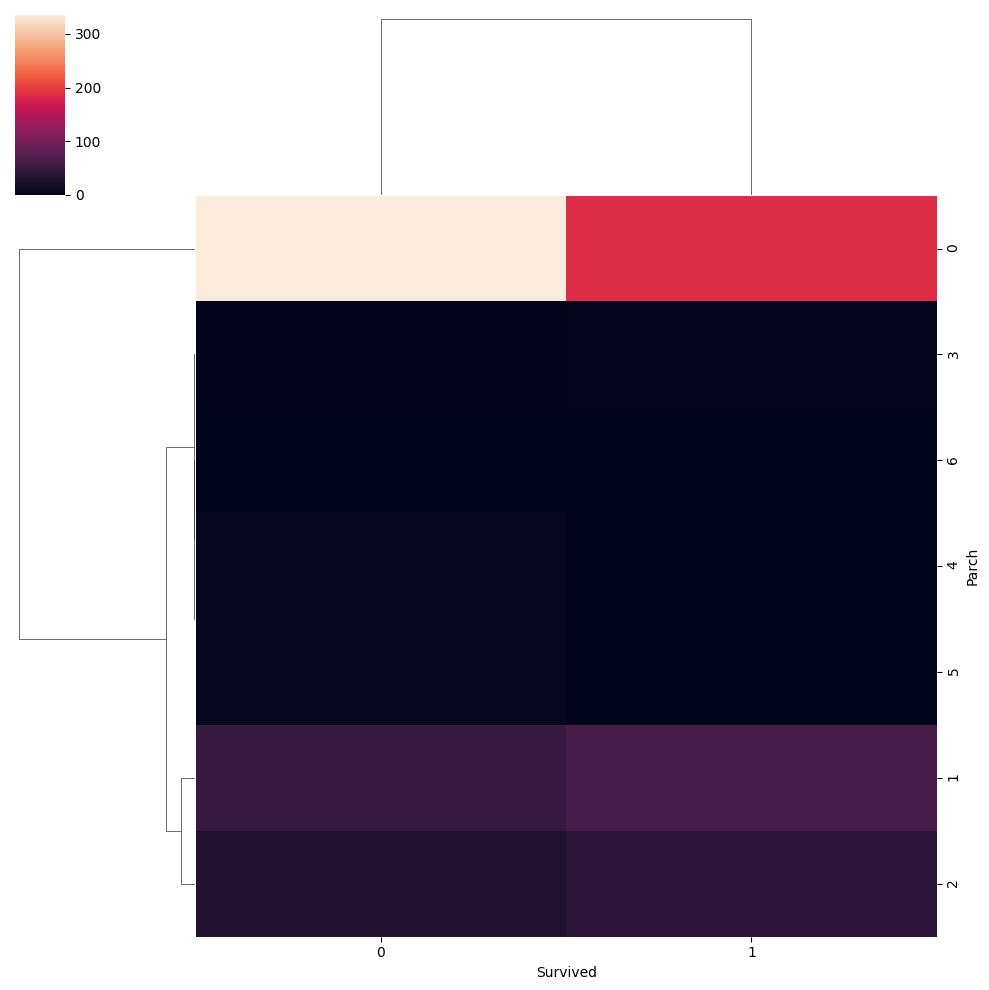

In [22]:
sns.clustermap(pd.crosstab(df['Parch'], df['Survived']))
plt.show()

# 3. Pandas Profilling :- 
Pandas profiling is a powerful Python library for data analysis and exploration. It provides a comprehensive report of a dataset, allowing you to quickly understand the structure and properties of your data. The report includes a summary of the data, missing values, and a distribution of variables.
​
* **Advantages**
 * **Ease of use:** Pandas profiling is very easy to use. ...
 * **Time-saving:** Pandas profiling can create a comprehensive report with a wide range of information about a dataset with minimal effort.
 * **Interactive HTML reports:** Pandas profiling generates interactive HTML reports that are easy to analyze and understand.

In [23]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report Of Titanic Dataset")

# profile.to_file(output_file = 'Titanic_ProfileReport.html')

# Download created Titanic_ProfileReport.html and open it

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_19/270169816.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`